In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("../input/airline-passenger-traffic/airline-passenger-traffic(1).csv", header=None)

In [3]:
data.head()


,0,1
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [4]:
data.columns = ['Month', 'Passengers']
data.Month = pd.to_datetime(data.Month, format='%Y-%m')
data.Passengers = data.Passengers.astype("float64")
data = data.set_index('Month')

In [5]:
data.head()


,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


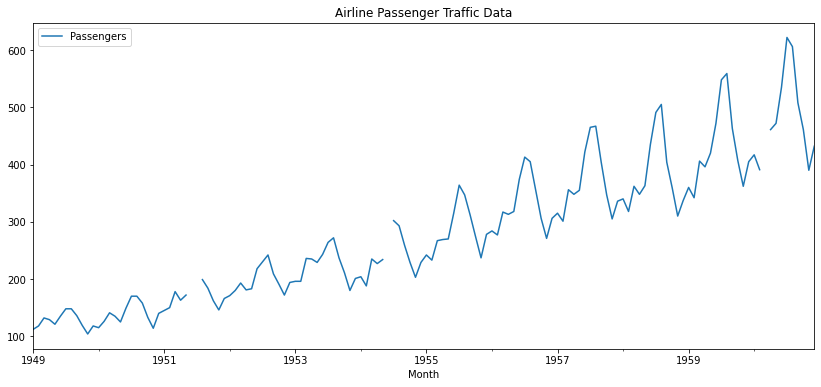

In [6]:
data.plot(figsize=(14,6))
plt.title('Airline Passenger Traffic Data')
plt.show(block=False)

In [7]:
data['Passengers_Mean_Imputation'] = data.Passengers.fillna(data.Passengers.mean())

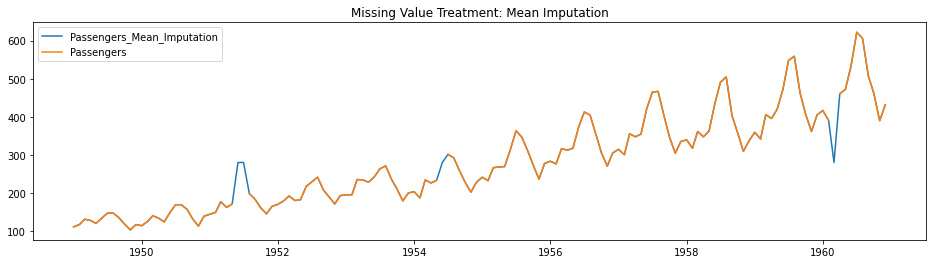

In [8]:
plt.figure(figsize=(16,4))
plt.plot(data.Passengers_Mean_Imputation, label='Passengers_Mean_Imputation')
plt.plot(data.Passengers, label='Passengers')
plt.legend(loc='best')
plt.title('Missing Value Treatment: Mean Imputation')
plt.show(block=False)

In [9]:
data.head()

,Passengers,Passengers_Mean_Imputation
Month,,
1949-01-01,112.0,112.0
1949-02-01,118.0,118.0
1949-03-01,132.0,132.0
1949-04-01,129.0,129.0
1949-05-01,121.0,121.0


In [10]:
data["Passengers"]=data["Passengers_Mean_Imputation"]
data.drop(columns=['Passengers_Mean_Imputation'],inplace=True)

In [11]:
data.head()

,Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


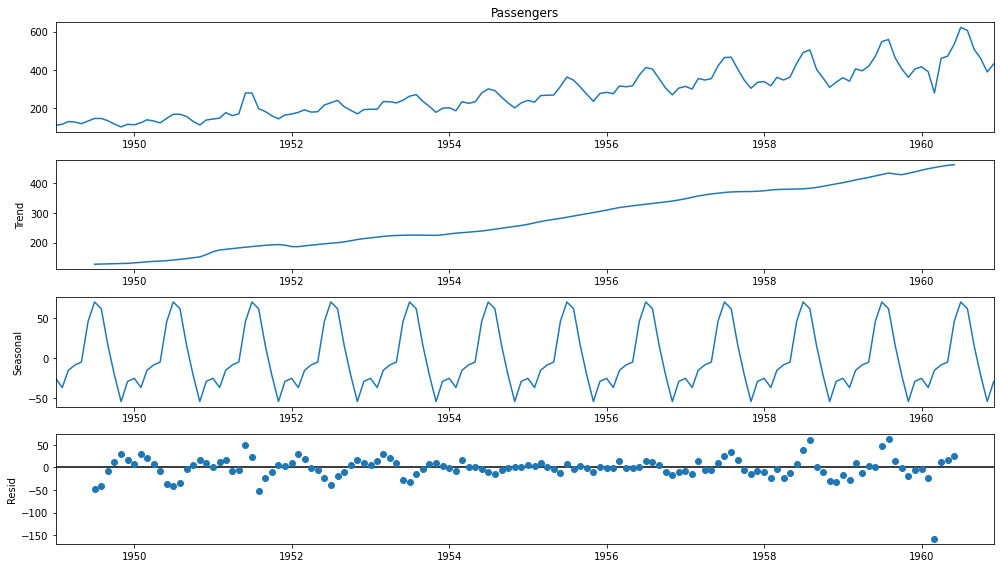

In [12]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = (14,8)
decomposition = sm.tsa.seasonal_decompose(data.Passengers, model='additive')
fig = decomposition.plot()
plt.show()

# Simple Average Method

__It is a method for inventory valuation or delivery cost calculation, where even if accepting inventory goods with different unit cost, the average unit cost is calculated by multiplying the total of these unit costs simply by the number of receiving__ 

In [13]:
L=124
train = data[0:L]
def create_method(title, func):
    yhat = data[124 :].copy()
    yhat[title] = func
    return yhat

In [14]:
yavg = create_method('avg_forecast', train.Passengers.mean())

In [15]:
def plot_method(yhat, title):
    plt.figure(figsize=(12,4))
    plt.plot(data[: 124].Passengers, label = 'Train')
    plt.plot(data[124 :].Passengers, label = 'Test')
    plt.plot(yhat, label = title + ' Forecast')
    plt.legend(loc='best')
    plt.title(title + ' Method')
    plt.show()

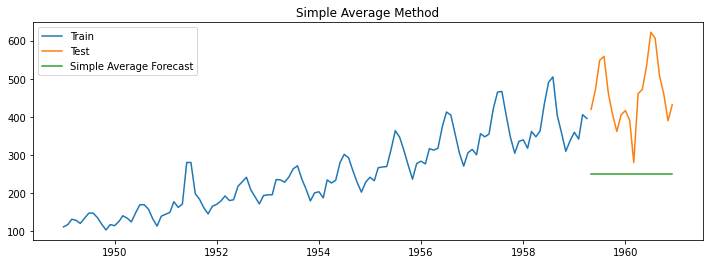

In [16]:
plot_method(yavg.avg_forecast, 'Simple Average')

In [17]:
from sklearn.metrics import mean_squared_error
def error(yhat, title, prevResults, length):
    rmse = np.sqrt(mean_squared_error(data[124 :].Passengers, yhat[length:])).round(2)
    mape = np.round(np.mean(np.abs(data[124 :].Passengers-yhat[length:])/data[124 :].Passengers)*100, 2)

    result = pd.DataFrame({'Method':[title + ' Method'], 'RMSE':[rmse], 'MAPE':[mape]})
    result = pd.concat([prevResults, result])
    return result

In [18]:
result= error(yavg.avg_forecast, 'Simple Average', None, 0)
result

,Method,RMSE,MAPE
0,Simple Average Method,224.41,43.47


# Simple Moving Average Method

__A simple moving average (SMA) is an arithmetic moving average calculated by adding recent prices and then dividing that figure by the number of time periods in the calculation average__

![](https://slideplayer.com/slide/6415346/22/images/12/Simple+Moving+Average+Formula.jpg)

In [19]:
ysma = data.copy()
ma_window = 12
ysma['sma_forecast'] = data.Passengers.rolling(ma_window).mean()
ysma.sma_forecast[L:] = ysma.sma_forecast[L-1]

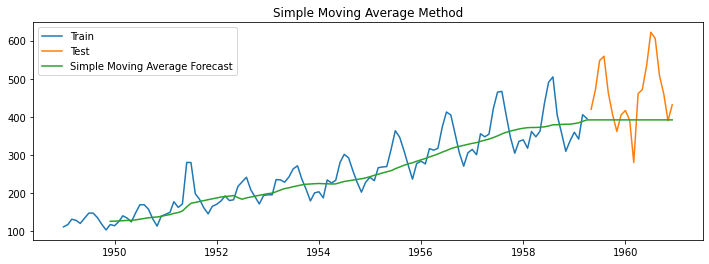

In [20]:
plot_method(ysma.sma_forecast, 'Simple Moving Average')

In [21]:
result = error(ysma.sma_forecast, 'Simple Moving Average', result, L)
result

,Method,RMSE,MAPE
0,Simple Average Method,224.41,43.47
0,Simple Moving Average Method,106.76,16.81


__Thankyou very much for reading__